In [1]:
!pip install plotly
!pip install cufflinks

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

%matplotlib inline

In [8]:
jsysoo = pd.read_csv("data/대회 설문조사지.csv", encoding = "cp949")

In [9]:
jsysoo

,타임스탬프,학년,성별,학과(전공),취미,평균 공부 시간,공부하는 시간,자격증 개수,출석,평균 수면 시간,...,희망 연봉,학과 만족 O/X,취업 선호도,소셜 미디어 사용시간,통학 시간,학업 스트레스,교우관계,알바 유무,방과후 유무,방과후 만족도
0,2023. 10. 12 오후 12:21:46,2학년,남자,창업마케팅과,운동,1시간-2시간,방과후(저녁),4,절대 안빠지죠,6시간 이상 자요,...,3000,O,5,1시간-2시간,10-30분,2,3,X,O(아래 질문에 답변해주세요!),8.0
1,2023. 10. 12 오후 12:21:49,2학년,남자,창업마케팅과,게임,0-30분,기타,4,반년에 한두번 빠져요,4~6시간 자요,...,2000,O,5,2시간-3시간 이상,10-30분,3,2,X,O(아래 질문에 답변해주세요!),5.0
2,2023. 10. 12 오후 12:23:07,3학년,남자,소프트웨어개발과,게임,0-30분,기타,6,절대 안빠지죠,6시간 이상 자요,...,3000,O,7,1시간-2시간,10-30분,2,1,X,X,NaN
3,2023. 10. 12 오후 12:23:25,3학년,남자,소프트웨어개발과,게임,0-30분,밤,5,절대 안빠지죠,4~6시간 자요,...,3000,O,5,0-30분,10-30분,3,1,X,X,1.0
4,2023. 10. 12 오후 12:23:28,2학년,남자,창업마케팅과,음악,0-30분,기타,6,한달에 한두번 빠져요,2~4시간 자요,...,?,O,5,2시간-3시간 이상,1시간-2시간,1,1,O,X,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2023. 10. 17 오후 3:24:40,2학년,남자,스마트웹콘텐츠과,게임,0-30분,방과후(저녁),4,한달에 한두번 이상 빠져요,6시간 이상 자요,...,4000,O,7,2시간-3시간 이상,10-30분,3,1,X,X,NaN
283,2023. 10. 17 오후 3:27:17,2학년,남자,스마트웹콘텐츠과,게임,0-30분,방과후(저녁),4,절대 안빠지죠,6시간 이상 자요,...,?,O,5,2시간-3시간 이상,10-30분,3,1,X,X,1.0
284,2023. 10. 17 오후 3:27:41,2학년,남자,스마트웹콘텐츠과,운동,2시간-3시간 이상,방과후(저녁),4,절대 안빠지죠,4~6시간 자요,...,?,O,4,1시간-2시간,30-1시간,3,1,X,O(아래 질문에 답변해주세요!),8.0
285,2023. 10. 17 오후 3:28:23,2학년,남자,스마트웹콘텐츠과,운동,30분-1시간,밤,2,한달에 한두번 빠져요,6시간 이상 자요,...,5000,O,5,1시간-2시간,30-1시간,3,3,O,X,NaN


In [10]:
jsysoo.columns

Index(['타임스탬프', '학년', '성별', '학과(전공)', '취미', '평균 공부 시간', '공부하는 시간', '자격증 개수',
       '출석', '평균 수면 시간', '희망 진로', '수업 집중도', '수업 집중도(전공)', '희망 연봉', '학과 만족 O/X',
       '취업 선호도', '소셜 미디어 사용시간', '통학 시간', '학업 스트레스', '교우관계', '알바 유무', '방과후 유무',
       '방과후 만족도'],
      dtype='object')

In [11]:
jsysoo.shape

(287, 23)

In [12]:
jsysoo.isnull().sum()

타임스탬프           0
학년              0
성별              0
학과(전공)          0
취미              0
평균 공부 시간        0
공부하는 시간         0
자격증 개수          0
출석              0
평균 수면 시간        0
희망 진로           0
수업 집중도          0
수업 집중도(전공)      0
희망 연봉           0
학과 만족 O/X       0
취업 선호도          0
소셜 미디어 사용시간     0
통학 시간           0
학업 스트레스         0
교우관계            0
알바 유무           0
방과후 유무          0
방과후 만족도        93
dtype: int64

부족한 데이터는 삭제하고, 채워지지 않은 데이터는 평균으로 채움
다시금 조사할 수 없으니 빠르게 평균으로 처리함

In [13]:
jsysoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   타임스탬프        287 non-null    object 
 1   학년           287 non-null    object 
 2   성별           287 non-null    object 
 3   학과(전공)       287 non-null    object 
 4   취미           287 non-null    object 
 5   평균 공부 시간     287 non-null    object 
 6   공부하는 시간      287 non-null    object 
 7   자격증 개수       287 non-null    object 
 8   출석           287 non-null    object 
 9   평균 수면 시간     287 non-null    object 
 10  희망 진로        287 non-null    object 
 11  수업 집중도       287 non-null    int64  
 12  수업 집중도(전공)   287 non-null    int64  
 13  희망 연봉        287 non-null    object 
 14  학과 만족 O/X    287 non-null    object 
 15  취업 선호도       287 non-null    int64  
 16  소셜 미디어 사용시간  287 non-null    object 
 17  통학 시간        287 non-null    object 
 18  학업 스트레스      287 non-null    int64  
 19  교우관계    

In [14]:
jsysoo.describe()

,수업 집중도,수업 집중도(전공),취업 선호도,학업 스트레스,교우관계,방과후 만족도
count,287.000000,287.000000,287.000000,287.000000,287.000000,194.000000
mean,6.724739,7.181185,6.477352,2.522648,2.034843,6.396907
std,2.218213,2.326931,2.633567,0.926688,0.974593,2.814137
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,5.000000,2.000000,1.000000,5.000000
50%,7.000000,8.000000,6.000000,2.000000,2.000000,7.000000
75%,8.000000,9.000000,8.500000,3.000000,3.000000,9.000000
max,10.000000,10.000000,10.000000,4.000000,4.000000,10.000000


In [15]:
jsysoo.groupby("학년")["희망 진로"].value_counts()

학년   희망 진로  
1학년  취업         65
     아직 모르겠다    44
     대학교 진학     20
2학년  취업         74
     아직 모르겠다    31
     대학교 진학     24
3학년  대학교 진학     12
     취업         10
     아직 모르겠다     7
Name: 희망 진로, dtype: int64

<Axes: xlabel='학년,희망 진로'>

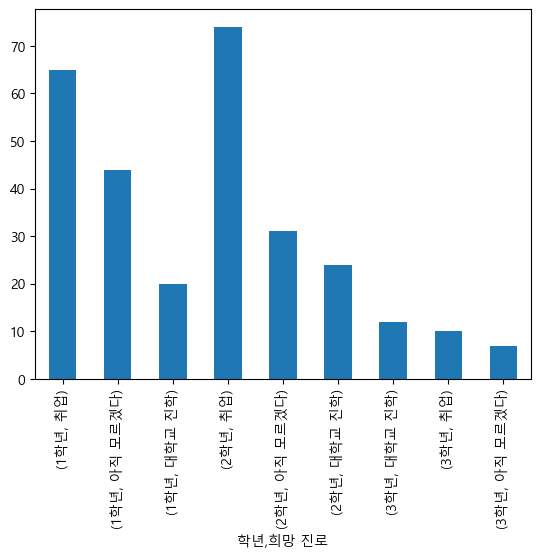

In [16]:
jsysoo.groupby("학년")["희망 진로"].value_counts().plot(kind="bar")

<Axes: xlabel='학과(전공),희망 진로'>

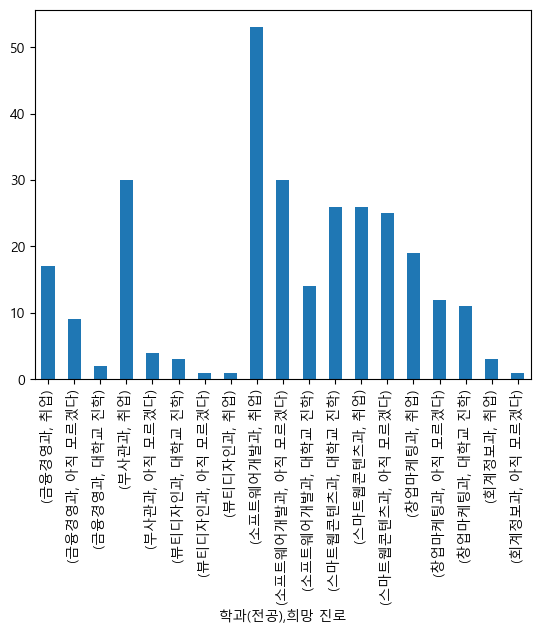

In [17]:
jsysoo.groupby("학과(전공)")["희망 진로"].value_counts().plot(kind="bar")

In [18]:
jsysoo.groupby("성별")["자격증 개수"].max()

성별
남자    9
여자    9
Name: 자격증 개수, dtype: object

In [19]:
jsysoo.groupby("자격증 개수")["성별"].value_counts()

자격증 개수  성별
1       남자    30
        여자    23
10      남자     1
10개 이상  남자     4
        여자     3
2       남자    42
        여자    28
3       남자    42
        여자    12
4       남자    48
        여자    14
5       남자    15
        여자    10
6       남자     4
        여자     2
7       남자     2
        여자     1
8       여자     3
        남자     1
9       남자     1
        여자     1
Name: 성별, dtype: int64

In [20]:
jsysoo.groupby("성별")["자격증 개수"].value_counts()

성별  자격증 개수
남자  4         48
    2         42
    3         42
    1         30
    5         15
    10개 이상     4
    6          4
    7          2
    10         1
    8          1
    9          1
여자  2         28
    1         23
    4         14
    3         12
    5         10
    10개 이상     3
    8          3
    6          2
    7          1
    9          1
Name: 자격증 개수, dtype: int64

<Axes: xlabel='성별,자격증 개수'>

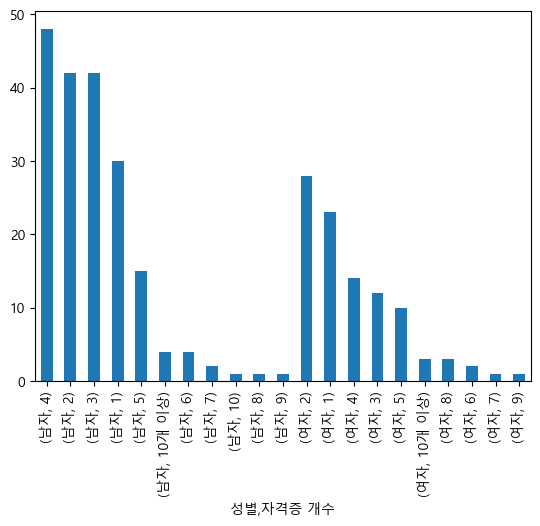

In [21]:
jsysoo.groupby("성별")["자격증 개수"].value_counts().plot(kind="bar")

<Axes: >

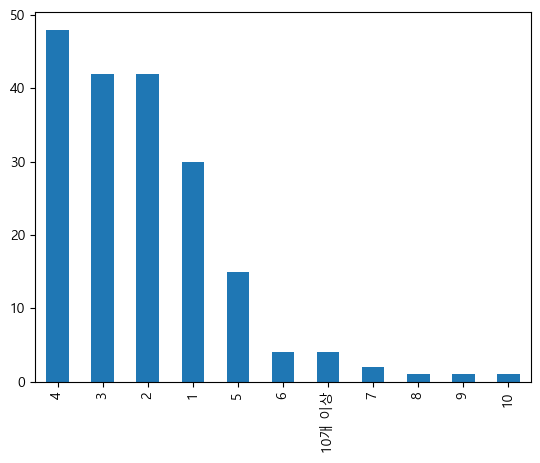

In [22]:
jsysoo[jsysoo["성별"]=="남자"]["자격증 개수"].value_counts().plot(kind="bar")

<Axes: >

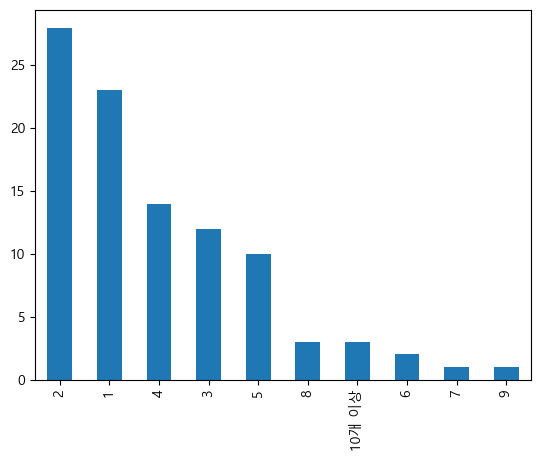

In [23]:
jsysoo[jsysoo["성별"]=="여자"]["자격증 개수"].value_counts().plot(kind="bar")

In [26]:
jsysoo.groupby("학년")["자격증 개수"].value_counts()

학년   자격증 개수
1학년  2         52
     1         43
     3         24
     4          6
     5          4
2학년  4         35
     3         27
     2         14
     5          9
     1          8
     10개 이상     5
     6          4
     8          3
     7          2
     10         1
     9          1
3학년  4          9
     5          9
     10개 이상     2
     2          2
     6          2
     1          1
     3          1
     7          1
     8          1
     9          1
Name: 자격증 개수, dtype: int64

<AxesSubplot:>

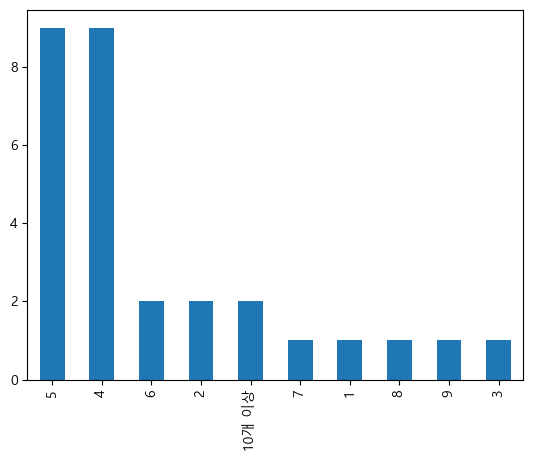

In [27]:
jsysoo[jsysoo["학년"]=="3학년"]["자격증 개수"].value_counts().plot(kind="bar")

In [24]:
jsysoo["성별"].value_counts()

남자    190
여자     97
Name: 성별, dtype: int64

In [25]:
male = jsysoo[jsysoo["성별"]=="남자"].sample(n=90)
female = jsysoo[jsysoo["성별"]=="여자"]

In [26]:
new_jsysoo = pd.concat([male,female])

In [27]:
new_jsysoo

,타임스탬프,학년,성별,학과(전공),취미,평균 공부 시간,공부하는 시간,자격증 개수,출석,평균 수면 시간,...,희망 연봉,학과 만족 O/X,취업 선호도,소셜 미디어 사용시간,통학 시간,학업 스트레스,교우관계,알바 유무,방과후 유무,방과후 만족도
219,2023. 10. 12 오후 8:05:32,2학년,남자,금융경영과,기타,1시간-2시간,방과후(저녁),3,한달에 한두번 빠져요,6시간 이상 자요,...,4000,O,5,2시간-3시간 이상,10-30분,3,3,X,X,3.0
184,2023. 10. 12 오후 5:18:46,2학년,남자,금융경영과,게임,30분-1시간,밤,7,절대 안빠지죠,6시간 이상 자요,...,3000,O,10,0-30분,30-1시간,2,1,O,X,NaN
112,2023. 10. 12 오후 3:48:52,1학년,남자,금융경영과,운동,30분-1시간,방과후(저녁),1,한달에 한두번 이상 빠져요,6시간 이상 자요,...,1000,X,6,1시간-2시간,10-30분,2,1,X,O(아래 질문에 답변해주세요!),10.0
188,2023. 10. 12 오후 6:05:24,2학년,남자,소프트웨어개발과,예술,2시간-3시간 이상,밤,4,절대 안빠지죠,1시간 이하 자요,...,1000,O,10,2시간-3시간 이상,2시간 이상,2,2,O,O(아래 질문에 답변해주세요!),10.0
61,2023. 10. 12 오후 1:51:20,1학년,남자,스마트웹콘텐츠과,게임,30분-1시간,방과후(저녁),1,절대 안빠지죠,6시간 이상 자요,...,4000,O,10,30-1시간,10-30분,2,3,X,O(아래 질문에 답변해주세요!),10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2023. 10. 17 오후 3:08:40,2학년,여자,스마트웹콘텐츠과,운동,1시간-2시간,방과후(저녁),4,절대 안빠지죠,2~4시간 자요,...,2000,O,8,1시간-2시간,1시간-2시간,4,1,O,O(아래 질문에 답변해주세요!),9.0
274,2023. 10. 17 오후 3:08:43,2학년,여자,스마트웹콘텐츠과,영상시청,30분-1시간,밤,4,한달에 한두번 빠져요,4~6시간 자요,...,8000,O,7,2시간-3시간 이상,30-1시간,3,1,X,O(아래 질문에 답변해주세요!),5.0
277,2023. 10. 17 오후 3:13:28,2학년,여자,스마트웹콘텐츠과,운동,0-30분,밤,4,절대 안빠지죠,2~4시간 자요,...,?,X,5,2시간-3시간 이상,10-30분,3,2,X,X,9.0
281,2023. 10. 17 오후 3:23:18,2학년,여자,스마트웹콘텐츠과,게임,1시간-2시간,밤,4,한달에 한두번 빠져요,6시간 이상 자요,...,5000,O,3,1시간-2시간,1시간-2시간,2,2,X,X,3.0


In [28]:
new_jsysoo=pd.melt(new_jsysoo,id_vars=["학과(전공)"],value_vars=["수업 집중도(전공)"])

In [29]:
new_jsysoo

,학과(전공),variable,value
0,금융경영과,수업 집중도(전공),5
1,금융경영과,수업 집중도(전공),10
2,금융경영과,수업 집중도(전공),10
3,소프트웨어개발과,수업 집중도(전공),10
4,스마트웹콘텐츠과,수업 집중도(전공),10
...,...,...,...
182,스마트웹콘텐츠과,수업 집중도(전공),4
183,스마트웹콘텐츠과,수업 집중도(전공),7
184,스마트웹콘텐츠과,수업 집중도(전공),2
185,스마트웹콘텐츠과,수업 집중도(전공),4


(1.0, 10.0)

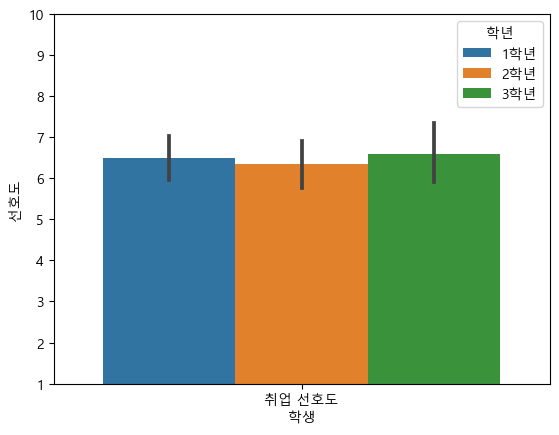

In [252]:
sns.barplot(data=new_jsysoo, x="variable", y="value",hue="학년", dodge=True)
plt.xlabel("학생")
plt.ylabel("선호도")
plt.ylim(1,10)

(1.0, 10.0)

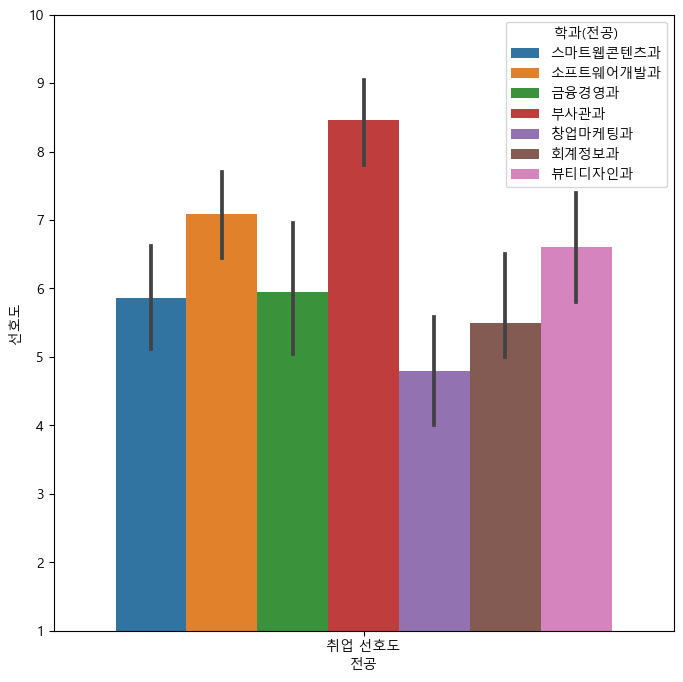

In [264]:
plt.figure(figsize=(8,8))
sns.barplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("전공")
plt.ylabel("선호도")
plt.ylim(1,10)

(1.0, 4.0)

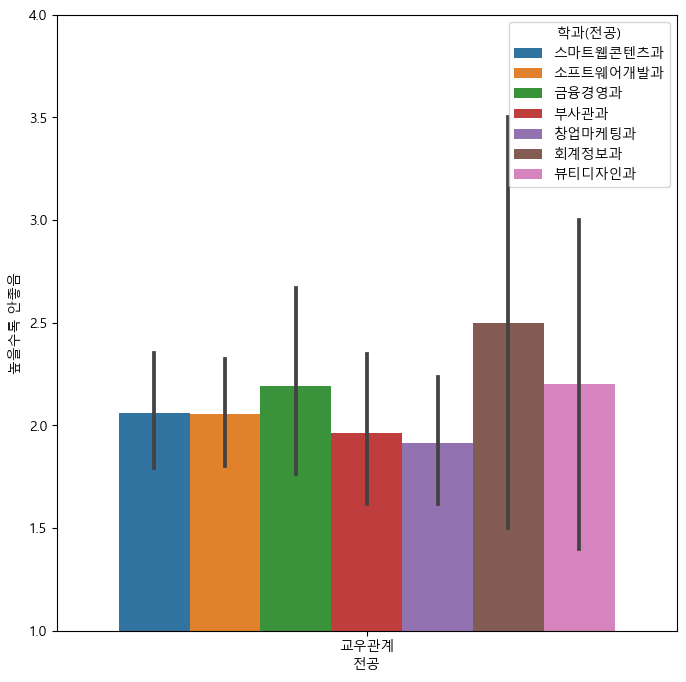

In [278]:
plt.figure(figsize=(8,8))
sns.barplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("전공")
plt.ylabel("높을수록 안좋음")
plt.ylim(1,4)

In [279]:
jsysoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   타임스탬프        267 non-null    object 
 1   학년           267 non-null    object 
 2   성별           267 non-null    object 
 3   학과(전공)       267 non-null    object 
 4   취미           267 non-null    object 
 5   평균 공부 시간     267 non-null    object 
 6   공부하는 시간      267 non-null    object 
 7   자격증 개수       267 non-null    object 
 8   출석           267 non-null    object 
 9   평균 수면 시간     267 non-null    object 
 10  희망 진로        267 non-null    object 
 11  수업 집중도       267 non-null    int64  
 12  수업 집중도(전공)   267 non-null    int64  
 13  희망 연봉        267 non-null    object 
 14  학과 만족 O/X    267 non-null    object 
 15  취업 선호도       267 non-null    int64  
 16  소셜 미디어 사용시간  267 non-null    object 
 17  통학 시간        267 non-null    object 
 18  학업 스트레스      267 non-null    int64  
 19  교우관계    

(1.0, 10.0)

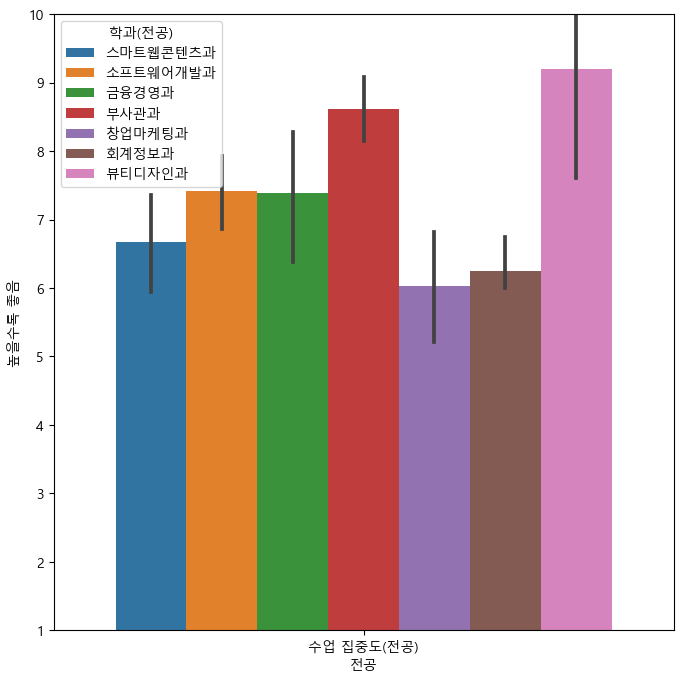

In [284]:
plt.figure(figsize=(8,8))
sns.barplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("전공")
plt.ylabel("높을수록 좋음")
plt.ylim(1,10)